In [ ]:
## 1. Data Preprocessing(20):
##Load the CIFAR-10 dataset using libraries like TensorFlow or PyTorch.
##Normalize the pixel values of the images to the range [0, 1].
##Resize the images to a uniform size if necessary (e.g., 32x32 pixels).
##Augment the training dataset with techniques such as random rotations, flips, and shifts to increase the diversity of the training data and improve model generalization.


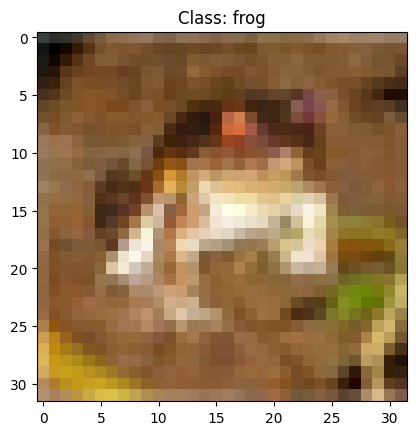

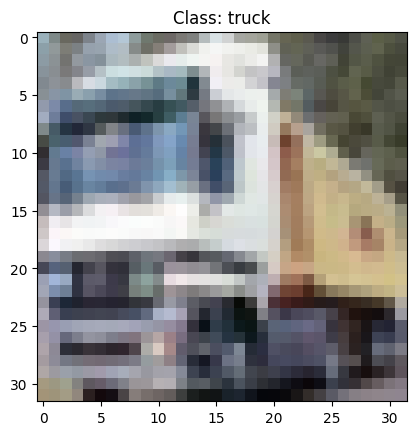

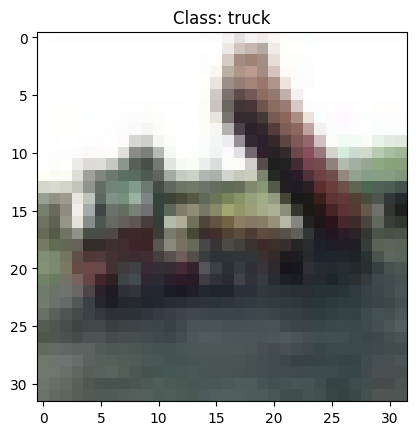

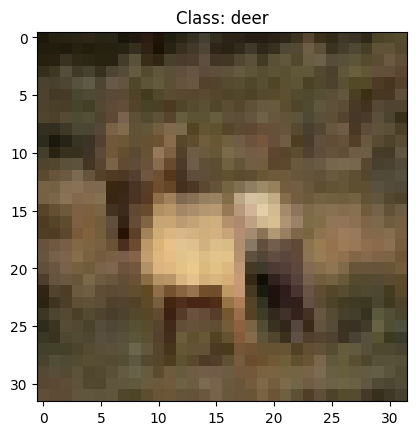

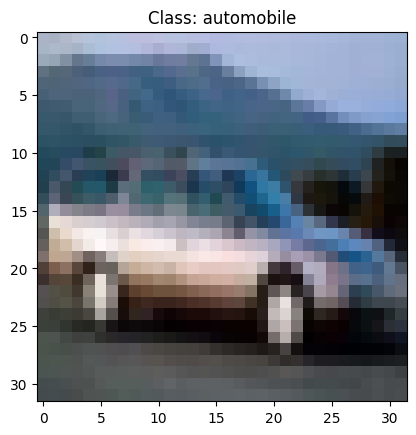

In [47]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# List of CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Display the first 5 images from the training set
for i in range(5):
    plt.imshow(train_images[i])  # Display the image
    class_name = class_names[train_labels[i][0]]  # Convert the label to class name
    plt.title(f"Class: {class_name}")
    plt.show()



In [ ]:
##2. Model Architecture(25):
##Design a CNN architecture suitable for image classification tasks.
##Define 
##Define the layers (convolutional layers, pooling layers, fully connected layers) and activation functions for your model.
##For this step, use a cell or comment to answer the input and output size of your layers, parameter numbers of your layers.
##Experiment with different architectures such as VGG, ResNet, or custom architectures by yourself.
##Tune hyperparameters such as learning rate, batch size, and optimizer choice.

In [21]:
import tensorflow as tf

# Define a custom CNN architecture
model = tf.keras.Sequential([
    # First Conv Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Second Conv Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Third Conv Layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    
    # Flatten and Dense Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Display model summary
model.summary()


C:\Users\16466\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
##3. Training(You could merge some steps implement and utilize)(20):
##Split the preprocessed dataset into training, validation, and test sets (e.g., 80% for training, 10% for validation, 10% for testing).
##Train your CNN model using the training set. Monitor the training process by tracking metrics like loss and accuracy on the validation set.
##Implement techniques like batch normalization to stabilize training and dropout to prevent overfitting.
##Utilize early stopping to prevent overfitting and save the best-performing model checkpoint.


In [24]:
from sklearn.model_selection import train_test_split

# Split the training set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


In [25]:
# Train the model with validation data
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3722 - loss: 1.7039 - val_accuracy: 0.5580 - val_loss: 1.2036
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.5930 - loss: 1.1468 - val_accuracy: 0.6472 - val_loss: 1.0015
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6691 - loss: 0.9433 - val_accuracy: 0.6748 - val_loss: 0.9148
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7158 - loss: 0.8043 - val_accuracy: 0.6904 - val_loss: 0.8727
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7500 - loss: 0.7096 - val_accuracy: 0.7038 - val_loss: 0.8442
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7811 - loss: 0.6204 - val_accuracy: 0.7148 - val_loss: 0.8362
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8033 - loss: 0.5539 - val_accuracy: 0.7106 - val_loss: 0.8768
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8279 -

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train again with dropout and batch normalization
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.3789 - loss: 1.9616 - val_accuracy: 0.5686 - val_loss: 1.2228
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.5828 - loss: 1.1984 - val_accuracy: 0.5948 - val_loss: 1.1445
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6447 - loss: 1.0155 - val_accuracy: 0.6034 - val_loss: 1.1346
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.6834 - loss: 0.9044 - val_accuracy: 0.6636 - val_loss: 0.9888
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7236 - loss: 0.8039 - val_accuracy: 0.5574 - val_loss: 1.3356
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7522 - loss: 0.7246 - val_accuracy: 0.6988 - val_loss: 0.8670
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7743 - loss: 0.6486 - val_accuracy: 0.7356 - val_loss: 0.7706
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7878 -

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels), callbacks=[early_stopping])


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9170 - loss: 0.2409 - val_accuracy: 0.7058 - val_loss: 1.1104
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9250 - loss: 0.2133 - val_accuracy: 0.6998 - val_loss: 1.2935
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9328 - loss: 0.1871 - val_accuracy: 0.7012 - val_loss: 1.4321
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9423 - loss: 0.1650 - val_accuracy: 0.7030 - val_loss: 1.4599


In [ ]:
##4. Evaluation(16):
##Evaluate the performance of your trained model using appropriate evaluation metrics with accuracy, precision, recall, and F1-score.
##Visualize the training/validation loss and accuracy curves to analyze the model's learning progress.
##Summary(writing or figures)error analysis to identify common misclassifications and areas for improvement.

In [15]:
from sklearn.metrics import classification_report

# Predict on the test set
test_predictions = model.predict(test_images)

# Convert predictions to class labels
test_predictions = test_predictions.argmax(axis=1)

# Generate classification report
print(classification_report(test_labels, test_predictions))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1000
           1       0.84      0.88      0.86      1000
           2       0.57      0.66      0.61      1000
           3       0.53      0.56      0.55      1000
           4       0.71      0.68      0.70      1000
           5       0.67      0.58      0.62      1000
           6       0.78      0.78      0.78      1000
           7       0.78      0.78      0.78      1000
           8       0.81      0.85      0.83      1000
           9       0.81      0.84      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



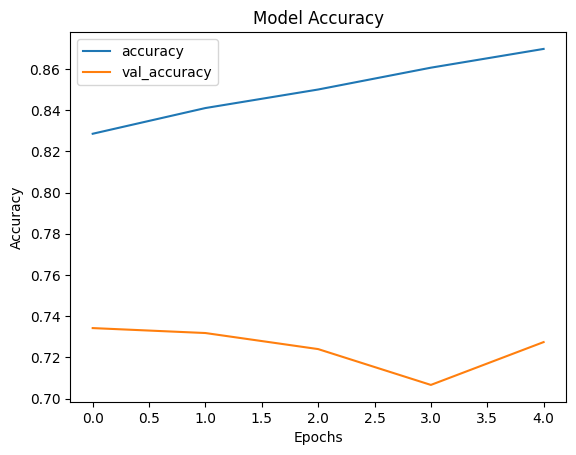

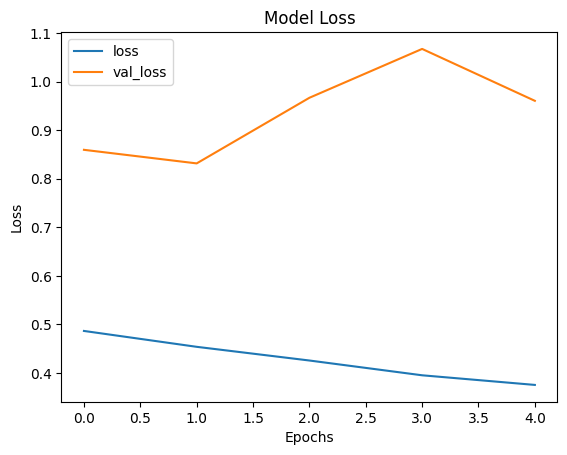

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


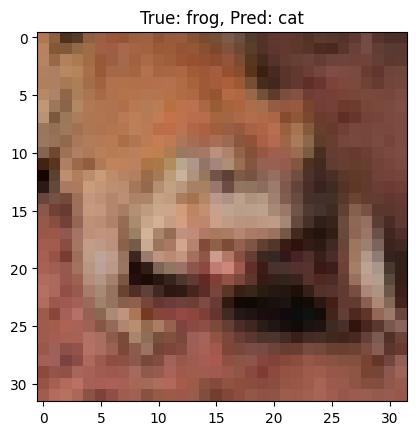

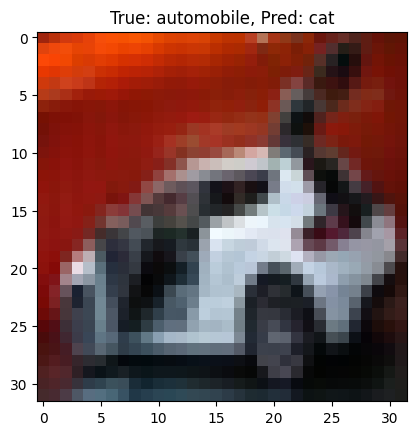

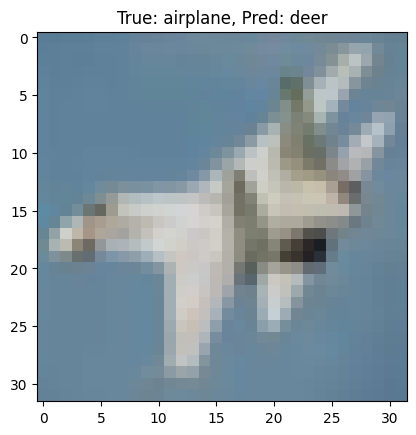

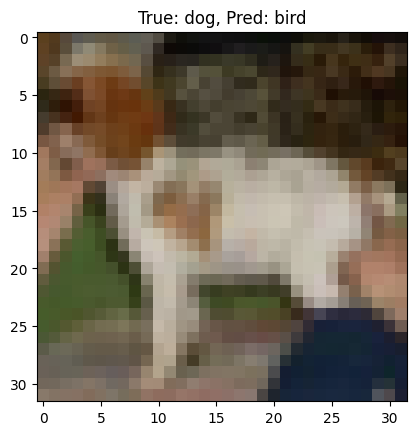

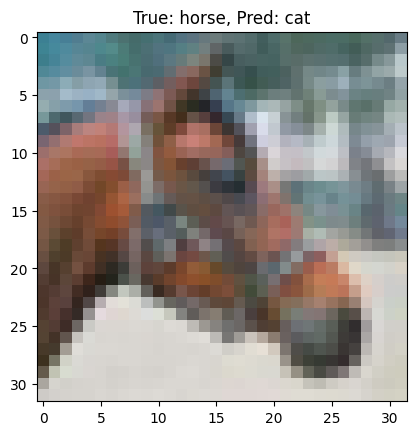

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# List of class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get indices of misclassified images
misclassified_idx = np.where(test_predictions != test_labels.flatten())[0]

# Display some misclassified images
for idx in misclassified_idx[:5]:  # Display first 5 misclassified images
    plt.imshow(test_images[idx])
    true_label = class_names[test_labels[idx][0]]  # Convert true label to class name
    pred_label = class_names[test_predictions[idx]]  # Convert predicted label to class name
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.show()


In [ ]:
##5. Testing(9):
##est your trained model on the separate test set to assess its generalization ability.
##Calculate and report the final test accuracy to measure the model's performance on unseen data.

In [49]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 7s - 22ms/step - accuracy: 0.7027 - loss: 1.1522
Test accuracy: 0.7027000188827515


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict labels for the test set
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)  # Convert probabilities to class labels

# Calculate precision, recall, and F1-score
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step
Precision: 0.7042
Recall: 0.7027
F1 Score: 0.7013
Confusion Matrix:
[[720  37  53  23  35  10   8  23  36  55]
 [ 16 832   5   8   4   4  14   7  21  89]
 [ 54  11 521  74  99  80  91  49  12   9]
 [ 23  16  50 484  82 198  68  44  11  24]
 [ 15   6  51  53 707  52  41  58   8   9]
 [  8   3  32 138  53 662  21  61   6  16]
 [  4   8  32  75  48  39 768   8   4  14]
 [  9   6  24  32  79  55   7 762   2  24]
 [ 67  56  11  16  16  10   6  16 750  52]
 [ 16  74   7  17   8  11   6  16  24 821]]
